In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import pickle
from testsuite.utilities import Pareto_split
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# plt.style.use('seaborn')
# import matplotlib.cm as cm
from testsuite.analysis import load_all, plot_pareto_2d, plot_all_pareto_2d, PLOT_STYLE, plot_measure

In [2]:
dir_path = os.getcwd()
result_dirs = sorted(os.listdir("./log_data/"))
result_dirs

['test_function_Saf_init10_MultiSurrogate_ei',
 'test_function_Saf_init10_MultiSurrogate_mean',
 'test_function_SmsEgo_init10_MultiSurrogate_ei',
 'test_function_SmsEgo_init10_MultiSurrogate_mean']

In [3]:
saf_ei_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[0]))
saf_mu_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[1]))
sms_ei_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[2]))
sms_mu_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[3]))

(0.0, 25.0)

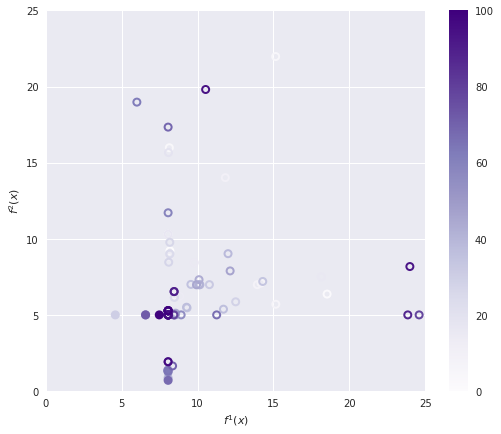

In [4]:
fig_safmu = plot_all_pareto_2d(saf_mu_results, plot_indices=[0])
fig_safmu.axes[0].set_xlim([0, 25])
fig_safmu.axes[0].set_ylim([0, 25])

(0.0, 25.0)

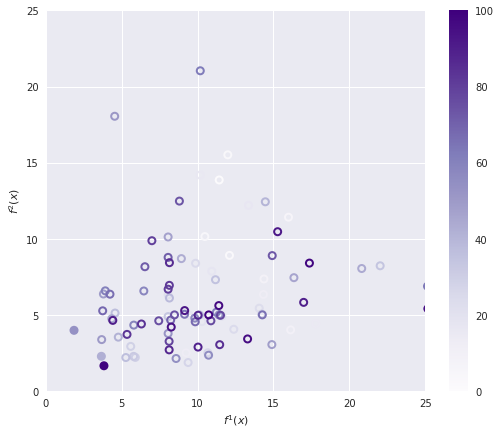

In [5]:
fig_safei = plot_all_pareto_2d(saf_ei_results, plot_indices=[0])
fig_safei.axes[0].set_xlim([0, 25])
fig_safei.axes[0].set_ylim([0, 25])


(0.0, 25.0)

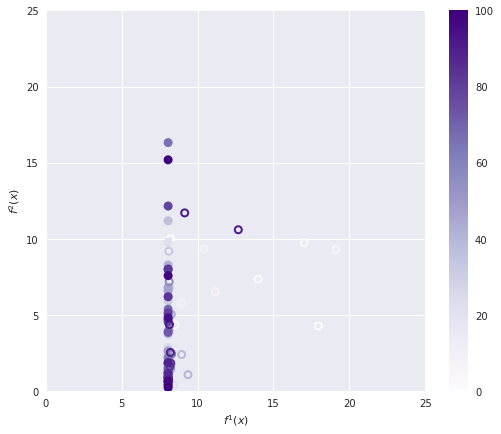

In [6]:
fig_smsmu = plot_all_pareto_2d(sms_mu_results, plot_indices=[0])
fig_smsmu.axes[0].set_xlim([0, 25])
fig_smsmu.axes[0].set_ylim([0, 25])

(0.0, 25.0)

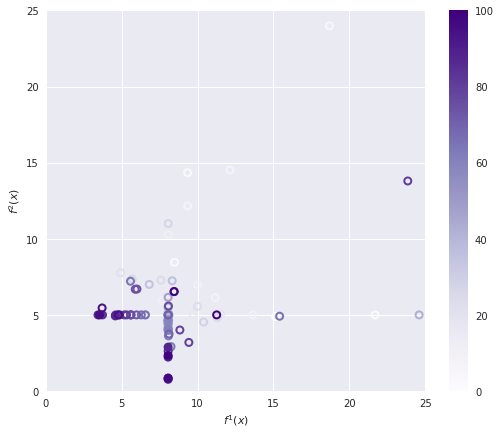

In [7]:
fig_smsei= plot_all_pareto_2d(sms_ei_results, plot_indices=[0])
fig_smsei.axes[0].set_xlim([0, 25])
fig_smsei.axes[0].set_ylim([0, 25])

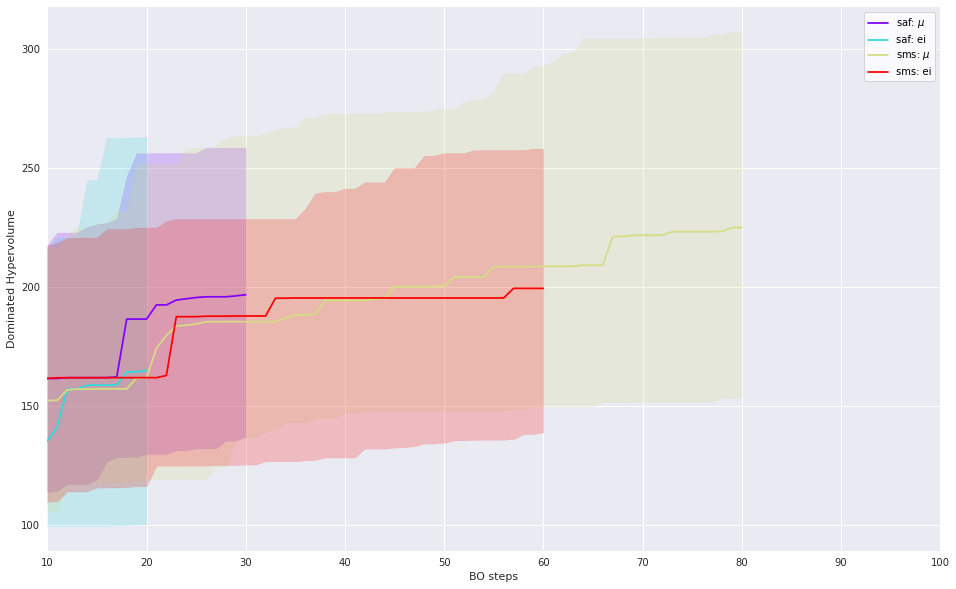

In [8]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(saf_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf: $\mu$", color=colors[0])
plot_measure(saf_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf: ei", color=colors[1])
plot_measure(sms_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms: $\mu$", color=colors[2])
plot_measure(sms_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms: ei", color=colors[3])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Dominated Hypervolume")
ax_hv.legend()

In [9]:
print(np.sum([len(errors) for errors in saf_ei_results["errors"]]), "\t",*[errors for errors in saf_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_mu_results["errors"]]), "\t",*[errors for errors in saf_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_ei_results["errors"]]), "\t",*[errors for errors in sms_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_mu_results["errors"]]), "\t",*[errors for errors in sms_mu_results["errors"] if len(errors)>0])

0 	
46 	 ['Error#02: Took 2 attempts to find unique solution at eval 94 seed:22', 'Error#02: Took 2 attempts to find unique solution at eval 100 seed:22'] ['Error#02: Took 2 attempts to find unique solution at eval 93 seed:20'] ['Error#01: Failed to find unique new solution at eval 101 seed:15', 'Error#03: Took removal of 2 points to find unique solution at eval 101'] ['Error#02: Took 2 attempts to find unique solution at eval 61 seed:7', 'Error#02: Took 2 attempts to find unique solution at eval 74 seed:7', 'Error#02: Took 2 attempts to find unique solution at eval 83 seed:7', 'Error#02: Took 3 attempts to find unique solution at eval 94 seed:7', 'Error#02: Took 2 attempts to find unique solution at eval 99 seed:7'] ['Error#02: Took 3 attempts to find unique solution at eval 74 seed:12', 'Error#02: Took 2 attempts to find unique solution at eval 83 seed:12', 'Error#02: Took 2 attempts to find unique solution at eval 87 seed:12', 'Error#01: Failed to find unique new solution at eval 93

In [19]:
print([times for times in saf_ei_results["train_time"]])
print([times for times in saf_mu_results["train_time"]])
print([times for times in sms_ei_results["train_time"]])
print([times for times in sms_mu_results["train_time"]])


[1414.0664241313934]
[1033.990067243576]
[701.2074341773987]
[1176.6795392036438]


In [20]:
from pymoo.factory import get_performance_indicator
import wfg

In [29]:
y = np.zeros((1,2))
y.shape

(1, 2)

In [30]:
igdp = get_performance_indicator("igd+", y)

def extract_performance(z, indicator):
    ANS  = []
    for i in range(9, len(z)):
        ans = indicator.calc(z[:i])
        ANS.append(ans)

    return ANS

In [31]:
saf_mu_results['igd'] = [extract_performance(saf_mu_results["y"][i], igdp) for i in range(len(saf_mu_results["y"]))]
saf_ei_results['igd'] = [extract_performance(saf_ei_results["y"][i], igdp) for i in range(len(saf_ei_results["y"]))]
sms_mu_results['igd'] = [extract_performance(sms_mu_results["y"][i], igdp) for i in range(len(sms_mu_results["y"]))]
sms_ei_results['igd'] = [extract_performance(sms_ei_results["y"][i], igdp) for i in range(len(sms_ei_results["y"]))]

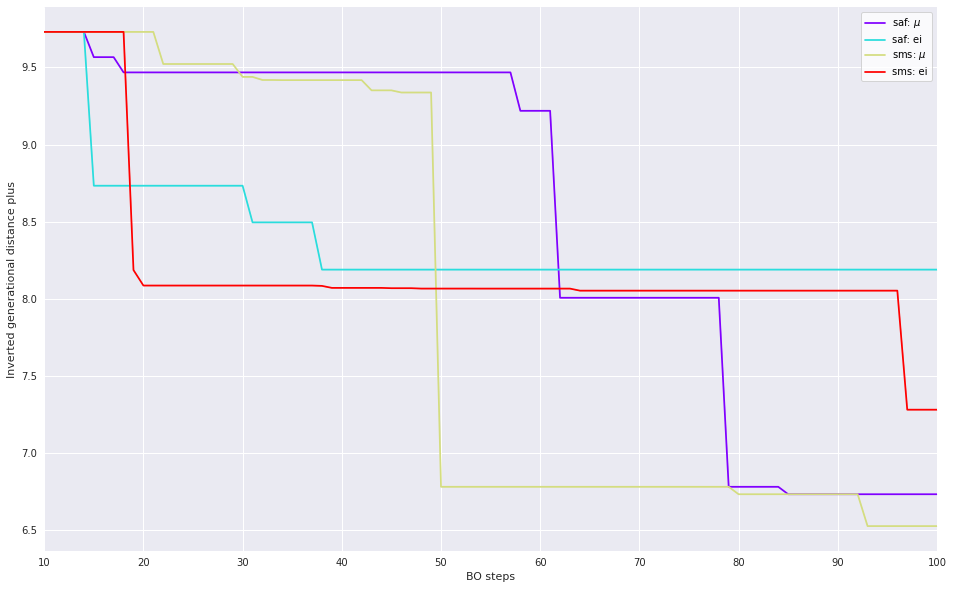

In [32]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(saf_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf: $\mu$", color=colors[0])
plot_measure(saf_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf: ei", color=colors[1])
plot_measure(sms_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms: $\mu$", color=colors[2])
plot_measure(sms_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms: ei", color=colors[3])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Inverted generational distance plus")
ax_hv.legend()